## Initialization

In [25]:
from cde_utility import *

fR3yx = lambda Rvec: fnRij(Rvec, 3, 1, 0)
fR3xx = lambda Rvec: fnRij(Rvec, 3, 0, 0)
fR3yy = lambda Rvec: fnRij(Rvec, 3, 1, 1)

def band_qsa( kmesh, N_xy, N_z, lat_type, lat, a_o_d=1.0/3.0, if_save_data=True ):
    # parameters
    kw = 0.0
    r0 = [0, 0, 0]
    N_R_z = N_z
    N_R_xy = N_xy

    # Transverse mode(p_z dipole mode)
    beta_z = -np.real( [ Rsum_direct(fR3, N_R_z, r0, kvec, kw, lat) 
                        for kvec in kmesh ] )
    w_T = np.sqrt( 1.0 - a_o_d**3*beta_z )

    # In-plane mode
    beta_11 = np.array( [ Rsum_direct(fR3xx, N_R_xy, r0, kvec, kw, lat) 
                         for kvec in kmesh ] )
    beta_11 = 3.0*beta_11 + beta_z

    beta_22 = np.array( [ Rsum_direct(fR3yy, N_R_xy, r0, kvec, kw, lat) 
                         for kvec in kmesh ] )
    beta_22 = 3.0*beta_22 + beta_z

    beta_21 = np.array( [ Rsum_direct(fR3yx, N_R_xy, r0, kvec, kw, lat) 
                         for kvec in kmesh ] )

    w_TI = 1.0 - a_o_d**3/2.0*\
    ( beta_11 + beta_22 + np.sqrt( (beta_11 - beta_22)**2 + 4.0*beta_21**2 ) )
    w_LI = 1.0 - a_o_d**3/2.0*\
    ( beta_11 + beta_22 - np.sqrt( (beta_11 - beta_22)**2 + 4.0*beta_21**2 ) )
    w_TI = np.sqrt(np.real(w_TI))
    w_LI = np.sqrt(np.real(w_LI))
    if if_save_data:
        np.savetxt('band-qsa-{}-Nz-{}-Nxy-{}.txt'.format(lat_type, N_R_z, N_R_xy),
                   np.c_[w_T, w_TI, w_LI],
                   fmt='%.6f', header='T \t TI \t LI',
                   comments='nk={:d}\n'.format(nk))
    return w_T, w_TI, w_LI

def plot_band_qsa( nk, kmesh, k_labels, w_T, w_TI, w_LI, lat_type, ifsave=True ):
    marker_style = dict(linestyle='-', lw=3, marker='',markersize=5, 
					#markerfacecolor='none', \
                    markerfacecoloralt='gray', markeredgewidth=1.5, \
                    clip_on=False)
    k_index = np.arange(len(kmesh))
    hi_sym_k = [0, nk-1, 2*nk-2, -1]
    hi_sym_k = k_index[hi_sym_k]

    plt.figure(figsize=(8,6))
    plt.plot(  k_index, w_T, 'o', color='orange', **marker_style, label='T mode'  )
    plt.plot( k_index, np.real(w_TI), 'ro', **marker_style, label='TI mode' )
    plt.plot( k_index, np.real(w_LI), 'bo', **marker_style, label='LI mode' )
    plt.xlim((k_index[0], k_index[-1]))
    axes = plt.gca()
    ymin, ymax = axes.get_ylim()
    plt.ylim((ymin, ymax))
    plt.xticks( hi_sym_k, k_labels, fontsize=22 )
    plt.vlines(hi_sym_k, ymin, ymax, lw=1, color='k')
    plt.ylabel(r'$\omega/\omega_0$')
    plt.title('{} Lattice Quasi-static Band Structure'.format(lat_type))
    plt.legend(loc='best', fontsize=20)
    plt.tight_layout()
    if ifsave:
        plt.savefig('band-qs-{}.pdf'.format(lat_type))
    plt.show()

## Square Lattice Test

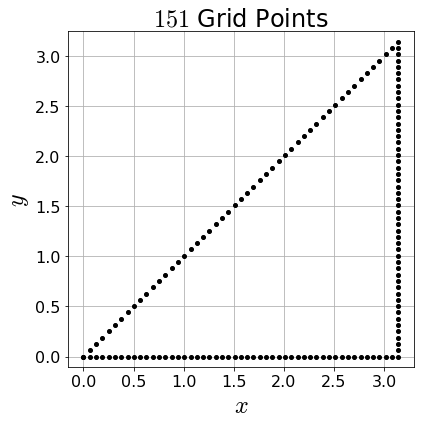

CPU times: user 38.1 s, sys: 9.46 s, total: 47.5 s
Wall time: 25.4 s


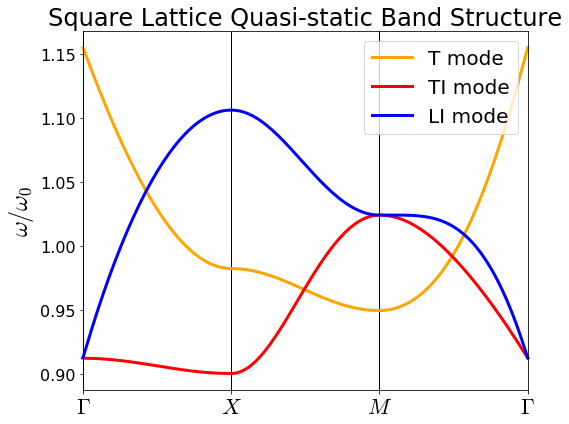

In [210]:
nk = 51
N_xy, N_z = 200, 200
lat_type = 'Square'
lat = square
k_labels = ['$\Gamma$', '$X$', '$M$', '$\Gamma$']

Gamma = lat.reci_vec(0, 0, 0)
X = lat.reci_vec(0.5, 0, 0)
M = lat.reci_vec(0.5, 0.5, 0)

square_kmesh = np.concatenate([kpath(Gamma, X, nk),
                            kpath(X, M, nk),
                            kpath(M, Gamma, nk, end_point=True)])
plot_grid(square_kmesh)

%time w_T, w_TI, w_LI = band_qsa( square_kmesh, N_xy, N_z, lat_type, lat )
plot_band_qsa( nk, square_kmesh, k_labels, w_T, w_TI, w_LI, lat_type)

## Triangular Lattice Test

In [35]:
nk = 51
N_xy, N_z = 200, 200
lat_type = 'Triangular'
k_labels = ['$\Gamma$', '$M$', '$K$', '$\Gamma$']

# tri = Lattice(a1=[0.5, -0.5*np.sqrt(3), 0], 
#               a2=[0.5, 0.5*np.sqrt(3), 0], 
#               a3=[0, 0, 1])
# tri = Lattice(a1=[3/2, np.sqrt(3)/2, 0], 
#               a2=[3/2, -np.sqrt(3)/2, 0], 
#               a3=[0, 0, -1])
# Gamma = lat.reci_vec(0, 0, 0)
# M = tri.reci_vec( 0.5, 0.5, 0 )
# K = tri.reci_vec( 2/3, 1/3, 0)
tri = Lattice(a1=[ np.sqrt(3)/2, 3/2, 0 ], 
              a2=[-np.sqrt(3)/2, 3/2, 0 ], 
              a3=[ 0, 0, 1 ])
lat = tri
Gamma = tri.reci_vec(0, 0, 0)
M = tri.reci_vec( 0.5, 0, 0 )
K = tri.reci_vec( 1/3, -1/3, 0)

tri_kmesh = np.concatenate([kpath(Gamma, M, nk),
                            kpath(M, K, nk),
                            kpath(K, Gamma, nk, end_point=True)])
plot_grid(tri_kmesh)

%time w_T, w_TI, w_LI = band_qsa( tri_kmesh, N_xy, N_z, lat_type, lat )

plot_band_qsa( nk, tri_kmesh, k_labels, w_T, w_TI, w_LI, lat_type)

In [78]:
lat_test = tri
k_test = K
nums = np.arange(10, 2500, 200)
# f3 =  [ Rsum_direct(fR3, nz, r0, k_test, kw, lat) for nz in nums ]
f3 =  [ Rsum_direct(fR3yx, nz, r0, k_test, kw, lat) for nz in nums ]

sums = np.array(f3)
err_re = rel_err( sums.real[1:], sums.real[:-1] )
err_im = rel_err( sums.imag[1:], sums.imag[:-1] )

power1, y1 = np.polyfit(np.log(nums[:-1]), np.log(np.fabs(err_re)), 1)
# print(power1, y1)
power2, y2 = np.polyfit(np.log(nums[:-1]), np.log(np.fabs(err_im)), 1)
# print(power2, y2)

label1 = r'$\mathrm{Re}(\frac{\Delta S}{S})$' + \
r'$\approx N^{{ {:.2f} }}$'.format(power1)
label2 = r'$\mathrm{Im}(\frac{\Delta S}{S})$' + \
r'$\approx N^{{ {:.2f} }}$'.format(power2)

# plt.rc('text', usetex=False)
# plt.rc('font', family='sans')

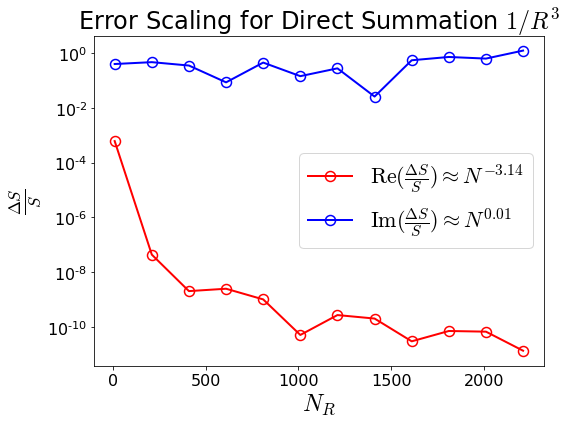

In [79]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.semilogy(nums[:-1], np.fabs(err_re), 'ro-', 
             label=label1, **marker_style)
# plt.semilogy(Ns[:-1], np.power(Ns[:-1], power1)*np.exp(y1), 'ko-')
plt.semilogy(nums[:-1], np.fabs(err_im), 'bo-',
             label=label2, **marker_style)
plt.xlabel(r'$N_R$')
plt.ylabel(r'$\frac{\Delta S}{S}$')
plt.title(r'Error Scaling for Direct Summation $1/R^3$')
plt.legend(loc='best', fontsize=22)
plt.tight_layout()
plt.savefig('direct-sum-error-R3-tri-K-point.pdf')
plt.show()

## Honeycomb Lattice

### Lattice sum related to different sites
$\newcommand{\vS}{{\bf{S}}}$
$\newcommand{\vt}{\vec{t}}$
$\newcommand{\vR}{\vec{R}}$
$\newcommand{\vkb}{\vec{k}_B}$
$\newcommand{\vnull}{\vec{0}}$
$$
M = \begin{bmatrix}
\frac{1}{\alpha_A} - \beta_{xx} &-\beta_{xy} 
&0 &-\tilde{\beta}^{AB}_{xx} &-\tilde{\beta}^{AB}_{xy} &0 \\
-\beta_{yx}	&\frac{1}{\alpha_A} - \beta_{yy}  
&0 &-\tilde{\beta}^{AB}_{yx} &-\tilde{\beta}^{AB}_{yy} &0 \\
0 &0 &\frac{1}{\alpha_A}-\beta_{z} &0 &0 &-\tilde{\beta}^{AB}_{z} \\
-\tilde{\beta}^{BA}_{xx} &-\tilde{\beta}^{BA}_{xy} &0
&\frac{1}{\alpha_B} - \beta_{xx} &-\beta_{xy} &0 \\
-\tilde{\beta}^{BA}_{yx} &-\tilde{\beta}^{BA}_{yy} &0
&-\beta_{yx}	&\frac{1}{\alpha_B} - \beta_{yy}  &0  \\
0 &0 &-\tilde{\beta}^{BA}_{z} &0 &0 &\frac{1}{\alpha_B} - \beta_{z}
\end{bmatrix}
$$
$$
\begin{gather}
\tilde{\beta}^{\mu\nu}_{ij} \equiv [\vS_2(\vt_{\mu\nu})]_{ij}
= \sum_{\vR}G_{ij}(\vnull, \vR+\vt_{\mu\nu}) e^{i\vkb\cdot(\vR+\vt_{\mu\nu})}
\quad i,j=x,y \\
\tilde{\beta}^{\mu\nu}_{z} \equiv [\vS_2(\vt_{\mu\nu})]_{zz}
= \sum_{\vR}G_{zz}(\vnull, \vR+\vt_{\mu\nu}) e^{i\vkb\cdot(\vR+\vt_{\mu\nu})}
\end{gather}
$$
$$
\begin{gather}
\beta_z = -S_3, \\
\beta_{ii} =  3 S_3^{ii} - S_3, \\
\beta_{ij} =  3 S_3^{ij}
\end{gather}
$$

In [124]:
fR3 = lambda Rvec: fRn(Rvec, 3)

def Rsum_direct_shift(func, numR, kvec, kw, lat, \
                      rvec=[0, 0, 0], 
                      Rshift=[0, 0, 0], origin=0):
    '''
    numpy vectorized version for direct real-space 
    lattice sum S(k, kw)
    origin = 0: exclude origin
    origin = 1j: include origin
    Rshift: shift vector for a site within a unit-cell
    '''
    grid = rmesh(numR, numR, lat, rmin=origin)
    grid = grid + Rshift
    terms = np.exp( 1j*np.dot(grid, kvec) ) * \
    np.exp( 1j*kw*vec_norm(rvec - grid, axis=1) ) * func(grid)
    return np.sum(terms)

def beta_z_tmn( tm, tn, kvec, kw, N_3, lat ):
    tm = np.array(tm)
    tn = np.array(tn)
    tmn = tm - tn
    if vec_norm( tmn ) == 0:
        origin = 0
    else:
        origin = 1j
    s3 = Rsum_direct_shift(fR3, N_3, kvec, kw, lat, \
                           Rshift=tmn, origin=origin)
    beta_z = -s3
    return beta_z

def beta_ij_tmn( i, j, tm, tn, kvec, kw, N_3, lat ):
    tm = np.array(tm)
    tn = np.array(tn)
    tmn = tm - tn
    if vec_norm( tmn ) == 0:
        origin = 0
    else:
        origin = 1j
    fR3ij = lambda Rvec: fnRij(Rvec, 3, i, j)
    s3ij = Rsum_direct_shift(fR3ij, N_3, kvec, kw, lat, \
                             Rshift=tmn, origin=origin)
    beta = 3*s3ij
    if i == j:
        s3 = Rsum_direct_shift(fR3, N_3, kvec, kw, lat, \
                               Rshift=tmn, origin=origin)
        beta += -s3
    return beta

from itertools import product

def B_matrix( kvec, kw, tvecs, N_3, lat ):
    N_t = len(tvecs)
    mat = np.zeros( (3*N_t, 3*N_t) , dtype=np.complex_ )
#     mat = np.empty( (3*N_t, 3*N_t) , dtype='object' )
    for m, n in product( np.arange(N_t), repeat=2 ):
        tm, tn = tvecs[m], tvecs[n]
        for i, j in product( np.arange(2), repeat=2):
            mat[ 3*m+i, 3*n+j ] = beta_ij_tmn( i, j, tm, tn, kvec, kw, N_3, lat )
        mat[ 3*m+2, 3*n+2 ] = beta_z_tmn( tm, tn, kvec, kw, N_3, lat )
#             mat[ 3*m+i, 3*n+j ] = 'M( {}, {} )'.format( 3*m+i+1, 3*n+j+1 )
#         mat[ 3*m+2, 3*n+2 ] = 'M( {}, {} )'.format( 3*m+2+1, 3*n+2+1 )
    return mat

In [178]:
tA = tri.lat_vec( 1./3, 1./3, 0)
tB = tri.lat_vec( 2./3, 2./3, 0)
kvec = [0.3, 0.2, 0]
kw = 0.1
N_3 = 100
tvecs = [tA,tB]
%time bmat = B_matrix( kvec, kw, tvecs, N_3, tri )
np.linalg.eigvals(bmat)

M_AB = bmat[0:3, 3:]
M_BA = bmat[3:, 0:3]
print(M_AB)
print(M_BA)

CPU times: user 481 ms, sys: 57.1 ms, total: 538 ms
Wall time: 442 ms


array([ 3.24440879+0.69915161j,  1.90845663+0.03667448j,
       -1.28263009-0.10382321j, -1.25241307-0.1127196j ,
       -4.89197434-0.71513309j,  2.27415208+0.19584981j])

Text(0,0.5,'$y$')

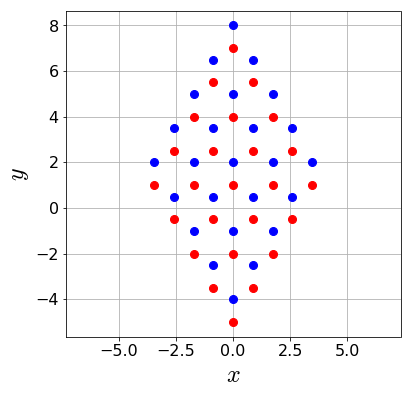

In [171]:
nx, ny = 2, 2
grid = rmesh( nx, ny, tri, rmin=1j)
gridA = grid + tA
gridB = grid + tB
plt.figure(figsize=(6,6))
XA = gridA[:, 0]
YA = gridA[:, 1]
XB = gridB[:, 0]
YB = gridB[:, 1]
nx = len(X)
ny = len(Y)
plt.plot(XA, YA, 'ro', markersize=8)
plt.plot(XB, YB, 'bo', markersize=8)
plt.grid('on')
plt.axis('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
# plt.title(r'${}$ Grid Points'.format(nx))

In [150]:
# Test
i,j = 0, 1
tA = tri.lat_vec( 1./3, 1./3, 0)
tB = tri.lat_vec( 2./3, 2./3, 0)
kvec = [0.3, 0, 0]
kw = 0.1
N_3 = 100
beta1 = beta_ij_tmn( i, j, tA, tB, kvec, kw, N_3, tri )
beta2 = beta_ij_tmn( j, i, tB, tA, kvec, kw, N_3, tri )
beta3 = beta_z_tmn( tA, tB, kvec, kw, N_3, tri )
beta4 = beta_z_tmn( tB, tA, kvec, kw, N_3, tri )
beta1, beta2
beta3, beta4

((-3.713621466673521-0.49995417815816767j),
 (-3.7136214666735206-0.49995417815816778j))

### Quasi-static Band structure

In [207]:
def band_qsa_composite( kvec, tvecs, N_3, lat_type, lat, \
                       a_o_d=1.0/3.0, if_save_data=True ):
    kw = 0.0
    bmat = B_matrix( kvec, kw, tvecs, N_3, lat )
    b_eigs = np.linalg.eigvals( bmat )
    band = np.real( np.sqrt( 1.0 - a_o_d**3*b_eigs ) )
    return np.sort( band )

from cycler import cycler

def plot_band_qsa_composite( nk_sub, band, k_labels, lat_type, ifsave=True ):
    marker_style = dict(linestyle='-', lw=3, marker='',markersize=5, 
					#markerfacecolor='none', \
                    markerfacecoloralt='gray', markeredgewidth=1.5, \
                    clip_on=False)
    band = np.array(band)
    nk, nband = np.shape(band)
    k_index = np.arange(nk)
    hi_sym_k = [0, nk_sub-1, 2*nk_sub-2, -1]
    hi_sym_k = k_index[hi_sym_k]
    
    plt.rc('axes', prop_cycle=(cycler('color', \
                                      ['k', 'b', 'y', 'orange', 'm', 'r'])) )
#                            cycler('linestyle', ['-', '--', ':', '-.'])))

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    for iband in np.arange(nband):
           ax.plot( k_index, band[:, iband] , 'o', \
                   **marker_style, label='Mode {}'.format(iband+1))
    plt.xlim((k_index[0], k_index[-1]))
    axes = plt.gca()
    ymin, ymax = axes.get_ylim()
    plt.ylim((ymin, ymax))
    plt.xticks( hi_sym_k, k_labels, fontsize=22 )
    plt.vlines(hi_sym_k, ymin, ymax, lw=1, color='k')
    plt.ylabel(r'$\omega/\omega_0$')
    plt.title('{} Lattice Quasi-static Band Structure'.format(lat_type))
#     plt.legend(loc='best', fontsize=20)
    plt.tight_layout()
    if ifsave:
        plt.savefig('band-qs-{}.pdf'.format(lat_type))
    plt.show()

In [ ]:
nk = 51
N_3 = 100
lat_type = 'Honeycomb'
k_labels = ['$\Gamma$', '$M$', '$K$', '$\Gamma$']

tri = Lattice(a1=[ np.sqrt(3)/2, 3/2, 0 ], 
              a2=[-np.sqrt(3)/2, 3/2, 0 ], 
              a3=[ 0, 0, 1 ])
lat = tri
Gamma = tri.reci_vec(0, 0, 0)
M = tri.reci_vec( 0.5, 0, 0 )
K = tri.reci_vec( 1/3, -1/3, 0)

tri_kmesh = np.concatenate([kpath(Gamma, M, nk),
                            kpath(M, K, nk),
                            kpath(K, Gamma, nk, end_point=True)])
plot_grid(tri_kmesh)

# a = 60*nm
# r_sphere = np.sqrt(3)/6*a
a_o_d = np.sqrt(3)/6
tA = tri.lat_vec( 1./3, 1./3, 0)
tB = tri.lat_vec( 2./3, 2./3, 0)
tvecs = [ tA, tB ]
%time band = [ band_qsa_composite( kvec, tvecs, N_3, lat_type, lat, \
                                  a_o_d=a_o_d) \
              for kvec in tri_kmesh ]

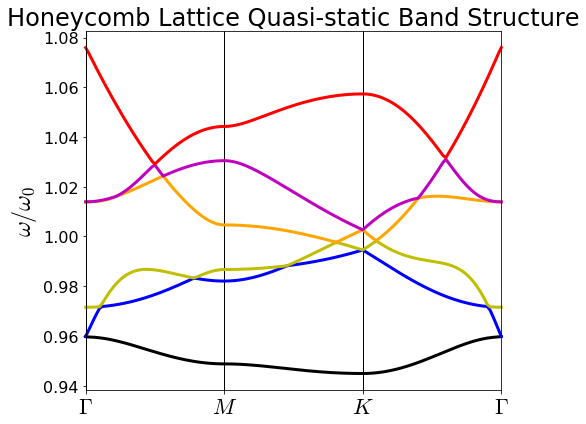

In [208]:
plot_band_qsa_composite( nk, band, k_labels, lat_type )